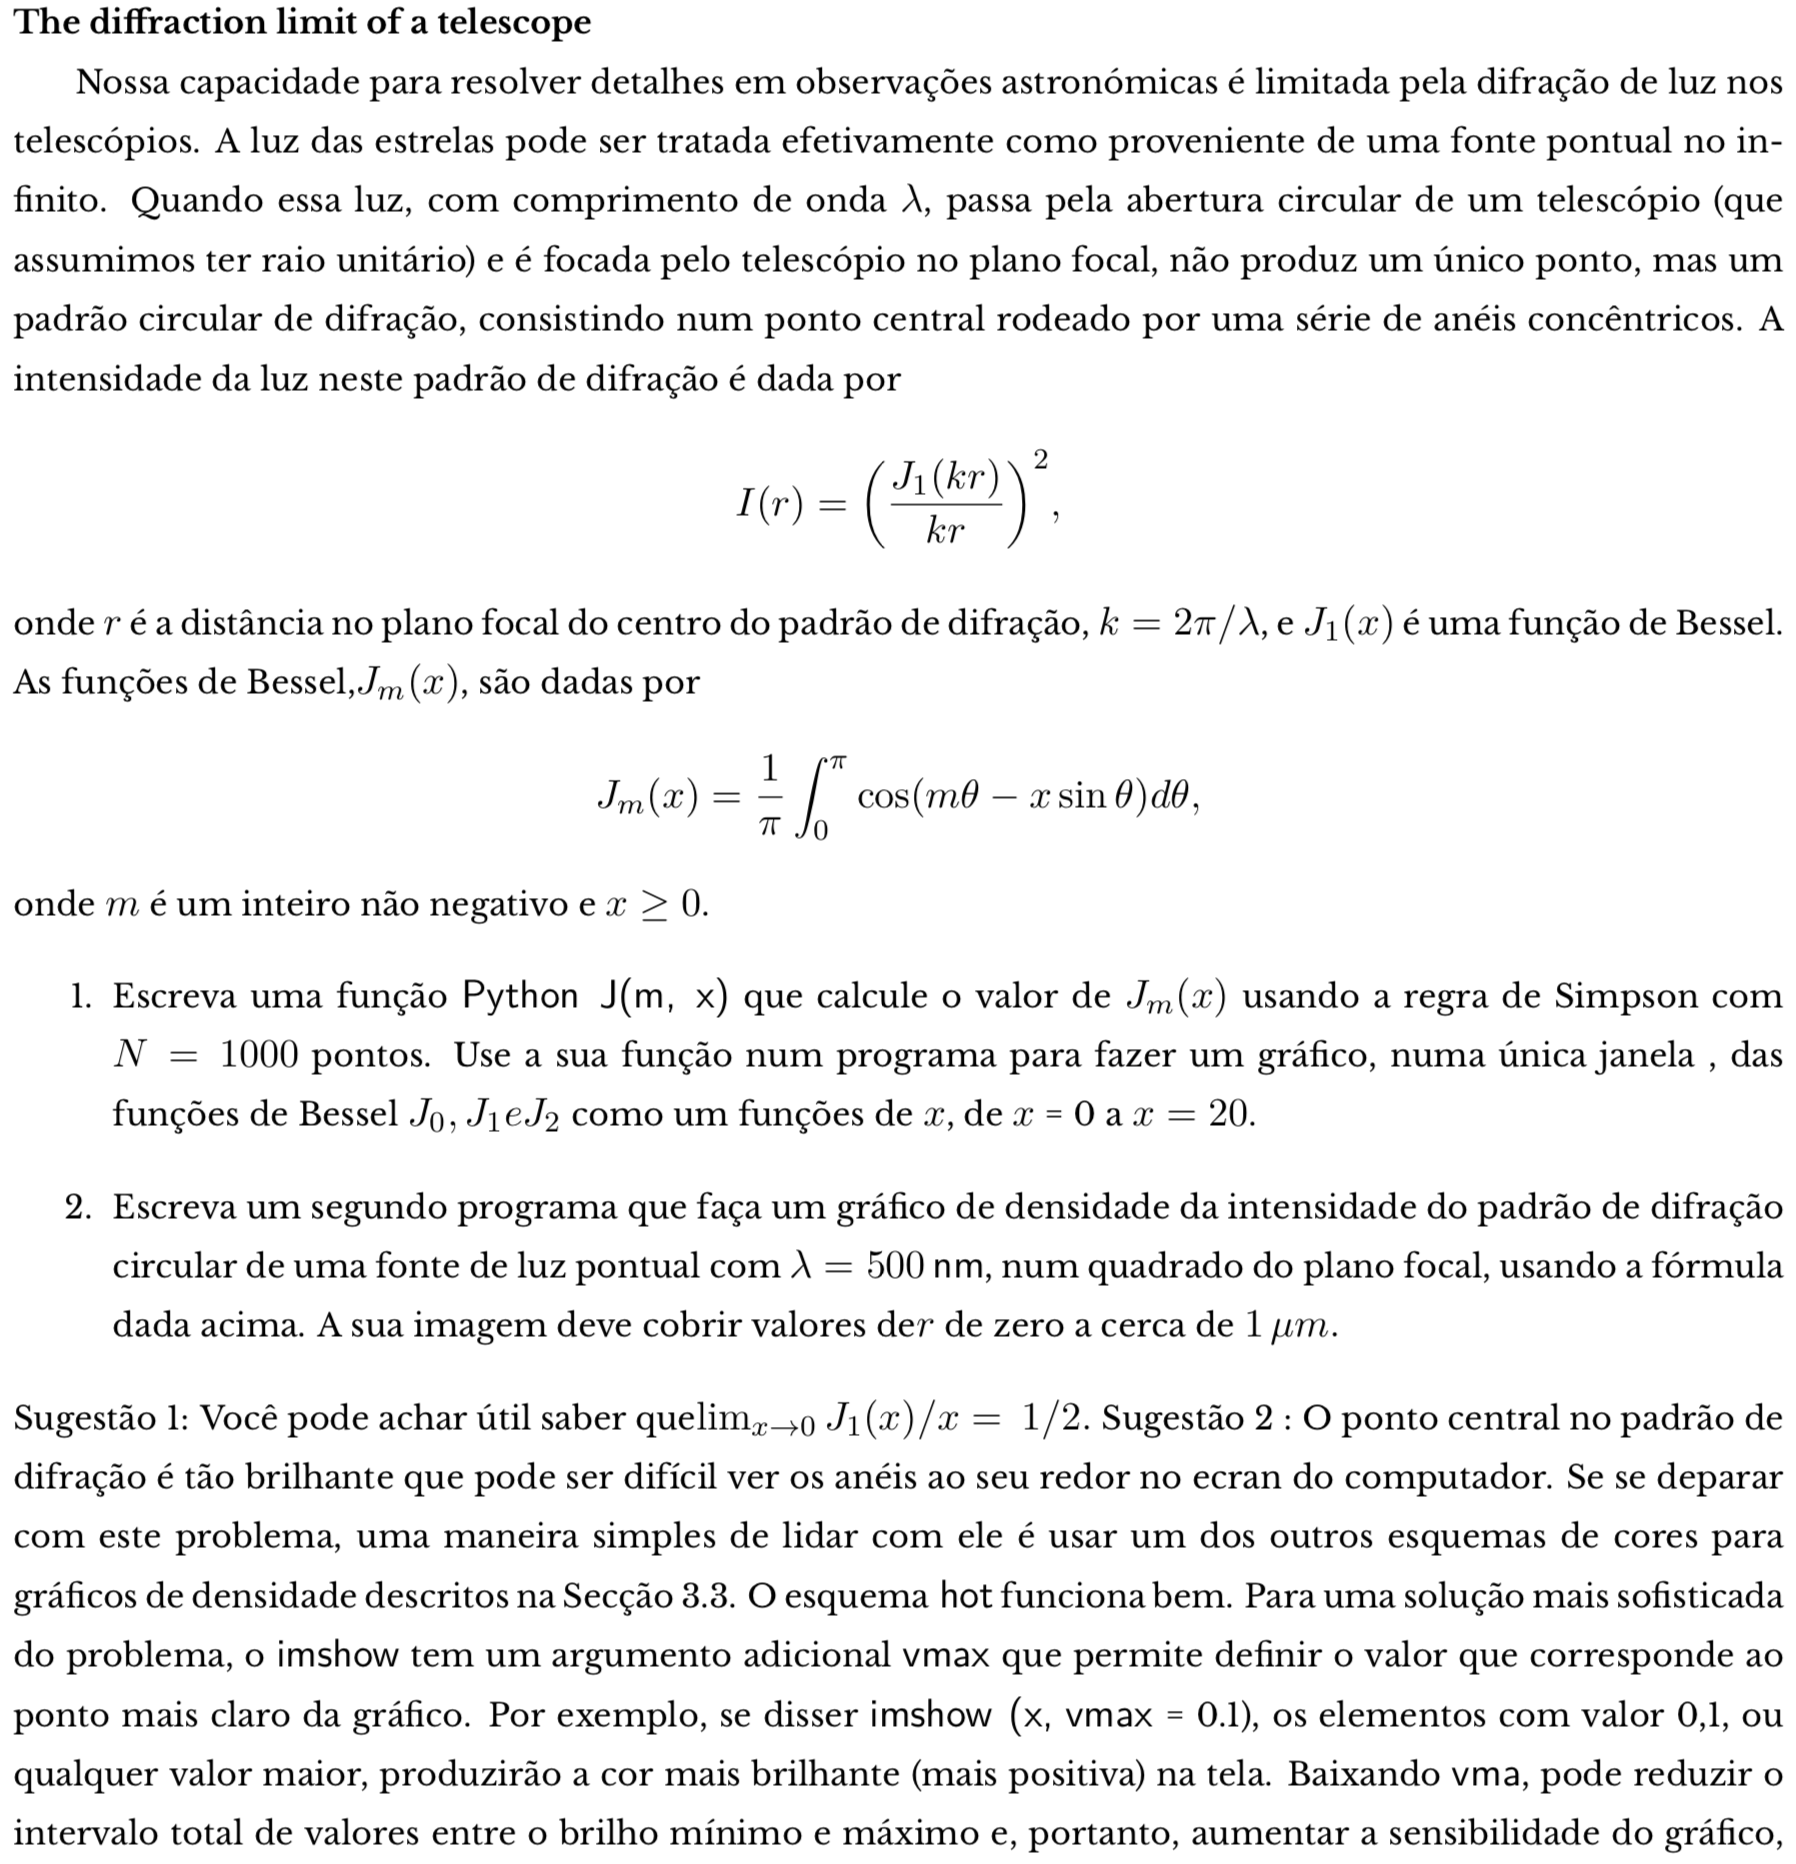

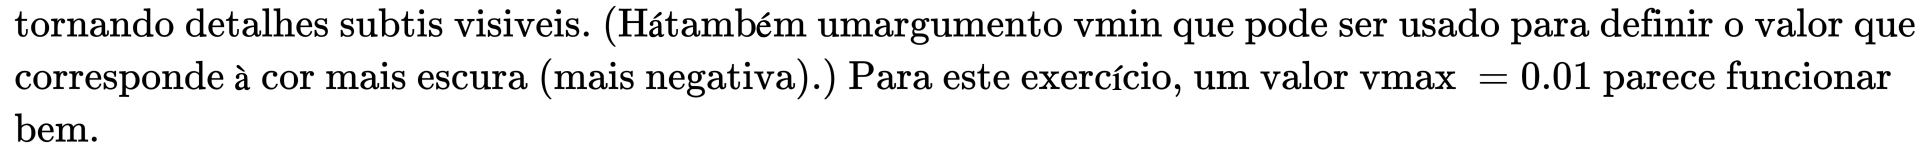

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
%matplotlib inline

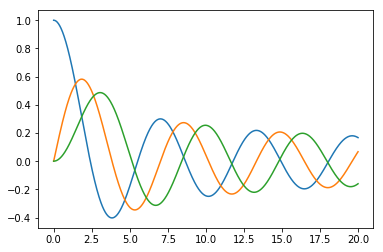

In [26]:
@jit
def J(m, x):
    h = np.pi / 1000
    theta = np.arange(0, np.pi + h, h)
    y = np.cos(m * theta - x * np.sin(theta))
    return h / 3 / np.pi * (y[0] + y[-1] + 4*y[1:-1:2].sum() + 2*y[2:-1:2].sum())

@jit
def bessel(a, b, N, m):
    x = np.linspace(a, b, N + 1)
    y = .0 * x
    for i in range(len(x)):
        y[i] = J(m, x[i])
    plt.plot(x, y)  
for i in range(3):
    bessel(0, 20, 1000, i)

In [27]:
@jit
def I(l, r):
    k_r = 2 * np.pi / l * r
    return ( J(1, k_r) / k_r ) ** 2
    
@jit
def intensity(L):
    data = np.zeros([L, L])
    for i in range(L + 1):
        for j in range(L + 1):
            if (i, j) != (L//2, L//2):
                r = np.sqrt((i - L / 2)**2 + (j - L / 2)**2)
                data[i][j] = I(500, r)
    plt.pcolormesh(data)

27 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


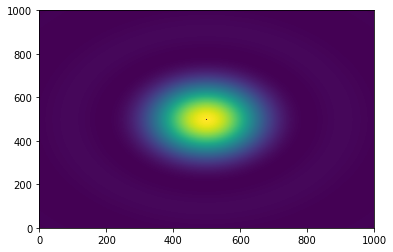

In [24]:
%timeit -n 1 -r 1 intensity(1000)

# Usar simetria!